First we combine all the data sets of weather in one CSV

In [ ]:
import pandas as pd
import glob

# Step 1: Path to all your CSV files
csv_files = glob.glob("time serise analysis/*.csv")  # e.g., "data/*.csv"

# Step 2: Read and combine
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Optional: Save for later
combined_df.to_csv("all_data_combined.csv", index=False)

# Now all your data is in one variable: combined_df
combined_df.head()


,datetime,Temperature,Humidity,Dew,Precipitation,Wind Speed,Wind Direction,Pressure,Solar Radiation,Solar Energy,UV Index
0,2023-07-01,28.3,74.34,23.3,0.0,2.9,62.8,1001.0,0.0,0.0,0
1,2023-07-01 01:00:00,27.5,76.50,23.0,0.0,3.2,65.7,1000.0,0.0,0.0,0
2,2023-07-01 02:00:00,24.3,70.53,18.6,0.0,6.4,130.0,1001.3,0.0,0.0,0
3,2023-07-01 03:00:00,27.0,74.58,22.1,0.0,8.6,54.8,1001.0,0.0,0.0,0
4,2023-07-01 04:00:00,27.1,71.48,21.5,0.0,8.6,63.2,1001.0,0.0,0.0,0


### Doing basic Statistics on the combined data and feature engineering for Machine learning models to improve performance:

In [266]:
combined_df.head()
combined_df.tail()
combined_df.info()  
combined_df.describe()  # Get a summary of the data
combined_df.columns
combined_df.shape  # Get the shape of the DataFrame
combined_df.dtypes  # Get the data types of each column
combined_df.rename(columns={"Temperature": "Temperature °C", "Wind Speed": "Wind Speed m/s", "Solar Radiation": "Solar Radiation W/m²", "Solar Energy": "Solar Energy kWh/m²", "Pressure": "Pressure hPa", "datetime": "Date Time"}, inplace=True)
combined_df.head()
# Now we will check the missing values in all columns
missing_values = combined_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
# Check for missing values again    
missing_values_after = combined_df.isnull().sum()
print("Missing values after DateTime conversion:")
# Dealing with date and time
combined_df['Date Time'].isna().sum()
combined_df[combined_df["Date Time"].isna()]
combined_df['Date Time'] = pd.to_datetime(combined_df['Date Time'], errors='coerce')
combined_df['Date Time'] = combined_df['Date Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
combined_df['Date Time'] = pd.to_datetime(combined_df['Date Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
combined_df['Date Time'].sort_index(inplace=True)
combined_df['Date Time'].dropna(inplace=True)
#combined_df['Date Time'] = combined_df["Date Time"].fillna(method='ffill')
combined_df["Date Time"].isna().sum()
# Now we have no missing values in the Date Time column
#combined_df['Date Time'] = pd.to_datetime(combined_df['Date Time'])
combined_df.set_index('Date Time', inplace=True)  # Set Date Time as index
combined_df.head(20)  # Check the index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73700 entries, 2023-07-01 to 2024-11-30
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Temperature °C        73700 non-null  float64       
 1   Humidity              73700 non-null  float64       
 2   Dew                   73700 non-null  float64       
 3   Precipitation         73700 non-null  float64       
 4   Wind Speed m/s        73700 non-null  float64       
 5   Wind Direction        73700 non-null  float64       
 6   Pressure hPa          73700 non-null  float64       
 7   Solar Radiation W/m²  73700 non-null  float64       
 8   Solar Energy kWh/m²   73700 non-null  float64       
 9   month                 73700 non-null  int32         
 10  day                   73700 non-null  int32         
 11  hour                  73700 non-null  int32         
 12  weekday               73700 non-null  int32         
 13 

,Temperature °C,Humidity,Dew,Precipitation,Wind Speed m/s,Wind Direction,Pressure hPa,Solar Radiation W/m²,Solar Energy kWh/m²,month,day,hour,weekday,dayofweek
Date Time,,,,,,,,,,,,,,
2023-07-01,28.3,74.34,23.3,0.0,2.9,62.8,1001.0,0.0,0.0,7,1,0,5,5
2024-05-28,27.5,76.50,23.0,0.0,3.2,65.7,1000.0,0.0,0.0,7,1,0,5,5
2024-08-21,24.3,70.53,18.6,0.0,6.4,130.0,1001.3,0.0,0.0,7,1,0,5,5
2024-08-21,27.0,74.58,22.1,0.0,8.6,54.8,1001.0,0.0,0.0,7,1,0,5,5
2023-12-07,27.1,71.48,21.5,0.0,8.6,63.2,1001.0,0.0,0.0,7,1,0,5,5
2023-12-07,24.3,70.14,18.5,0.0,6.4,50.0,1001.4,0.0,0.0,7,1,0,5,5
2023-12-07,27.5,66.47,20.7,0.0,11.5,70.4,1002.0,34.2,0.1,7,1,0,5,5
2024-11-16,29.4,60.63,21.0,0.0,8.3,79.7,1002.0,153.5,0.6,7,1,0,5,5
2024-11-16,27.9,56.85,18.5,0.0,6.7,50.0,1001.1,428.0,1.5,7,1,0,5,5


In [252]:
combined_df['Date Time'] = pd.to_datetime(combined_df.index)
combined_df['hour'] = combined_df['Date Time'].dt.hour
combined_df['day'] = combined_df['Date Time'].dt.day
combined_df['month'] = combined_df['Date Time'].dt.month
combined_df['dayofweek'] = combined_df['Date Time'].dt.dayofweek
print(combined_df.head())  # Check the new columns

            Temperature °C  Humidity   Dew  Precipitation  Wind Speed m/s  \
Date Time                                                                   
2023-07-01            28.3     74.34  23.3            0.0             2.9   
2023-07-01            27.5     76.50  23.0            0.0             3.2   
2023-07-01            24.3     70.53  18.6            0.0             6.4   
2023-07-01            27.0     74.58  22.1            0.0             8.6   
2023-07-01            27.1     71.48  21.5            0.0             8.6   

            Wind Direction  Pressure hPa  Solar Radiation W/m²  \
Date Time                                                        
2023-07-01            62.8        1001.0                   0.0   
2023-07-01            65.7        1000.0                   0.0   
2023-07-01           130.0        1001.3                   0.0   
2023-07-01            54.8        1001.0                   0.0   
2023-07-01            63.2        1001.0                   0.0  

In [253]:
combined_df.index.isna().sum()  # Check unique Date Time values

np.int64(0)

### Now we will plot the diffrent distribution with Scatter plot to see the distribution 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


##### We set the rolling beacuse noisy data 

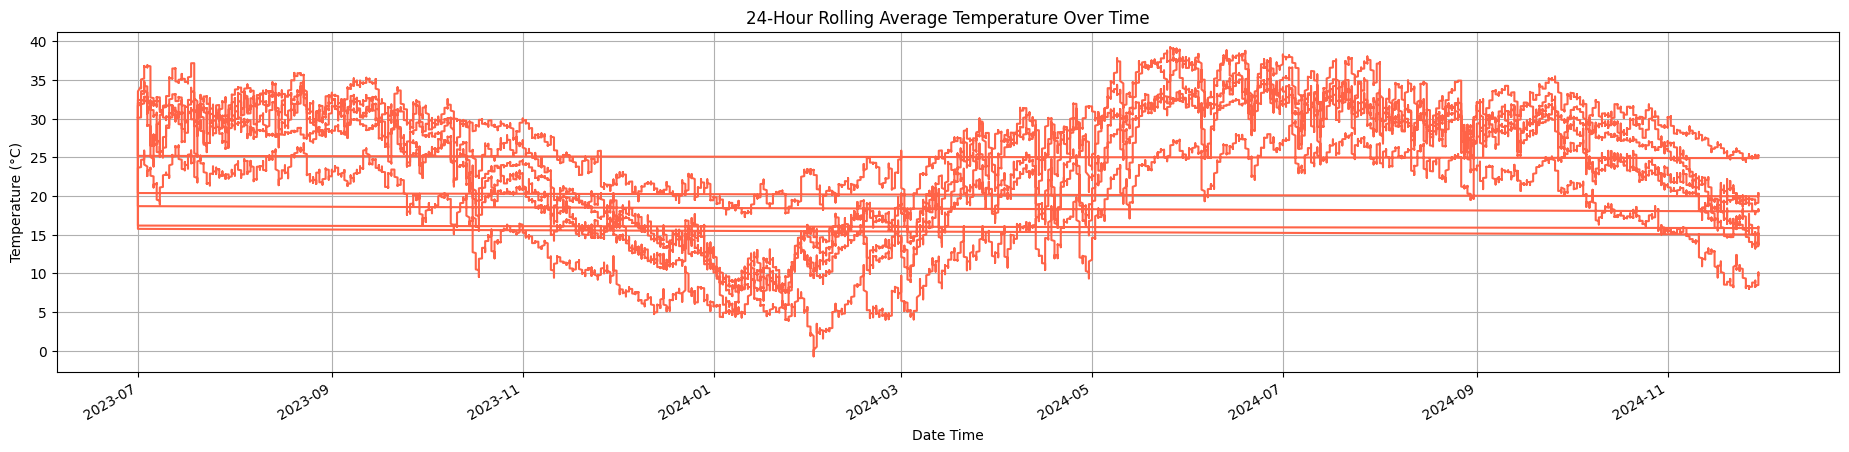

In [256]:
combined_df['Temperature °C'].rolling(window=24).mean().plot(figsize=(23,5), color='tomato', label='24-Hour Rolling Average')
plt.title('24-Hour Rolling Average Temperature Over Time')
plt.xlabel('Date Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

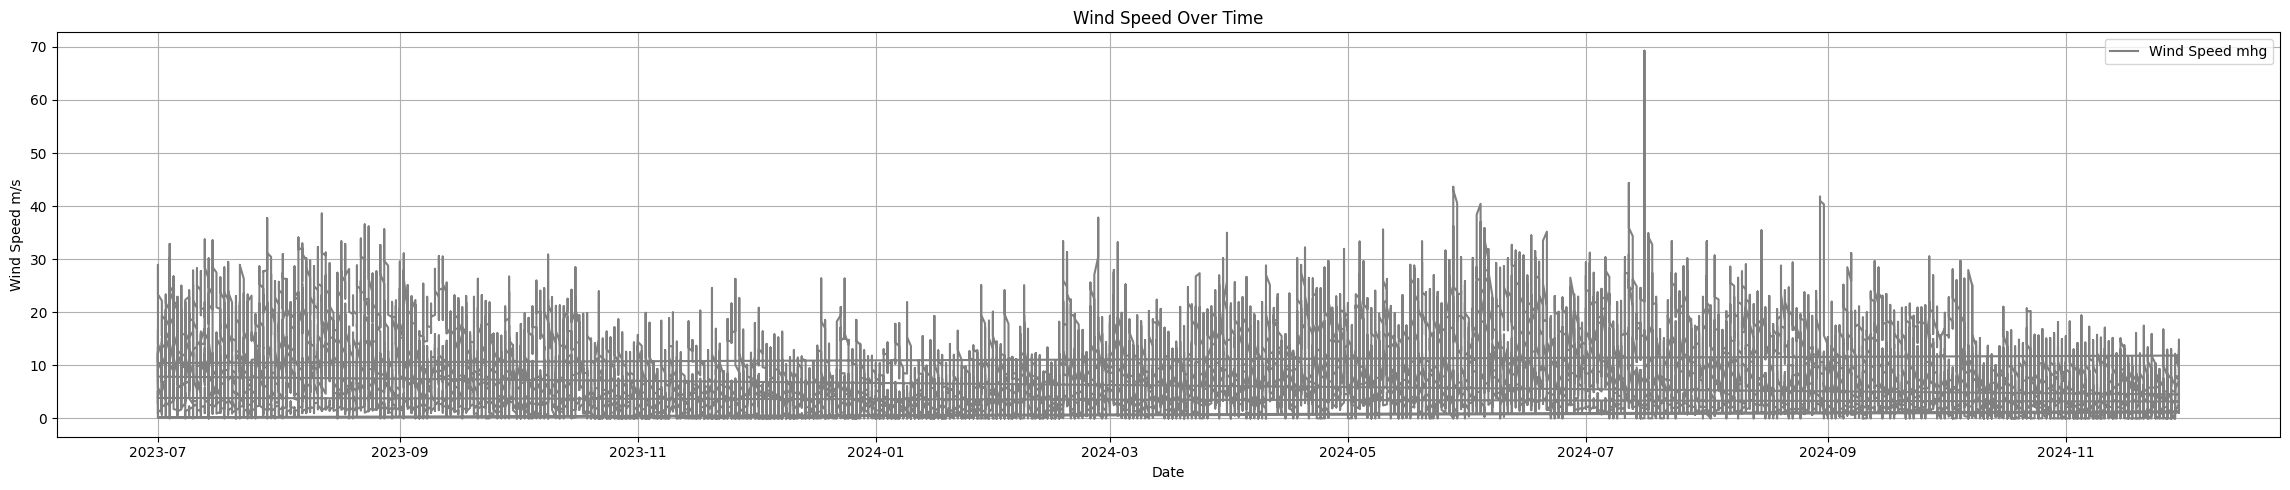

In [257]:
# Line plot for Wind Speed 
plt.figure(figsize=(23, 5))
plt.plot(combined_df['Wind Speed m/s'].rolling(window=7).mean(), label='Wind Speed mhg', color='grey')
plt.xlabel('Date')
plt.ylabel('Wind Speed m/s')
plt.title('Wind Speed Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

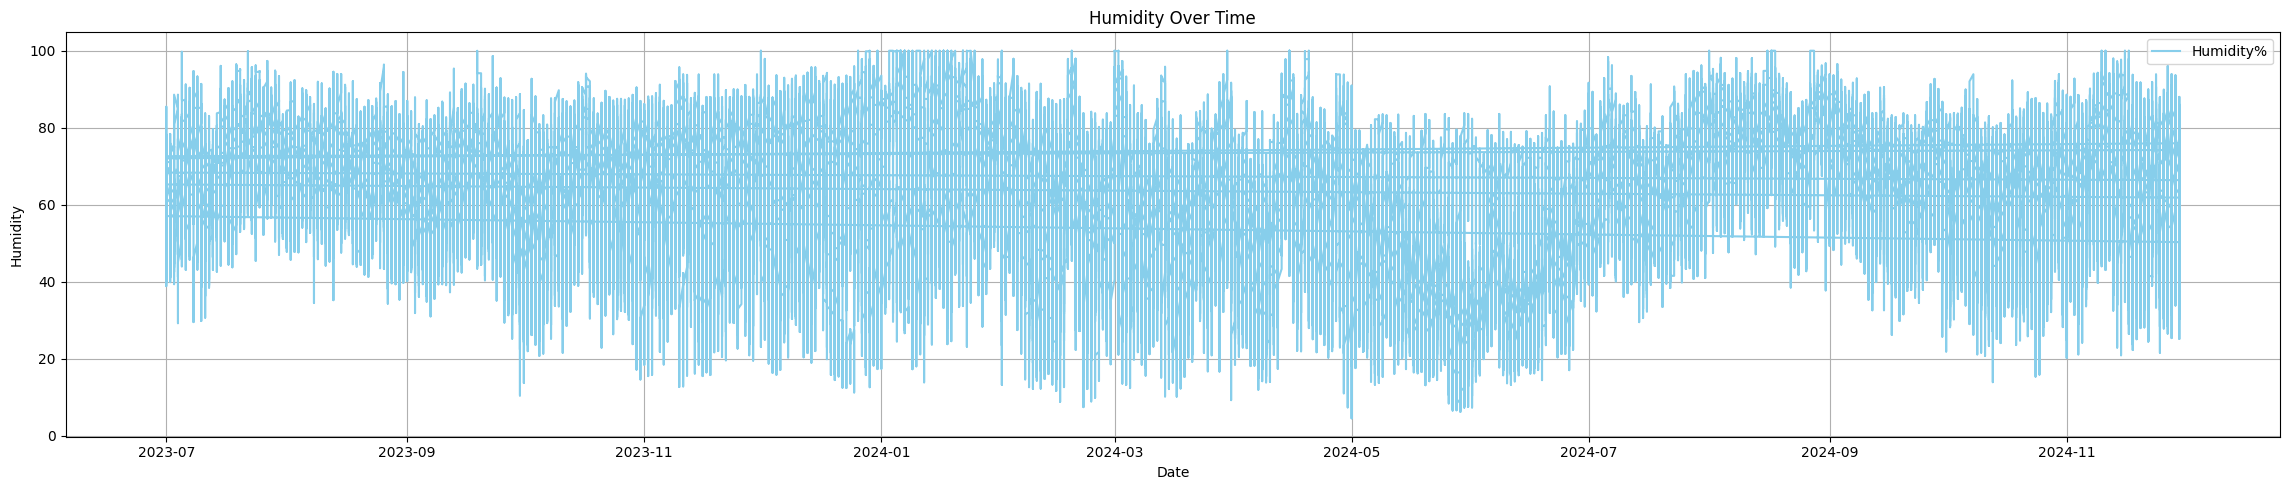

In [258]:
# Line plot for Wind Speed 
plt.style.use("default")
plt.figure(figsize=(23, 5))
plt.plot(combined_df['Humidity'].rolling(window=3).mean(), label='Humidity%', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

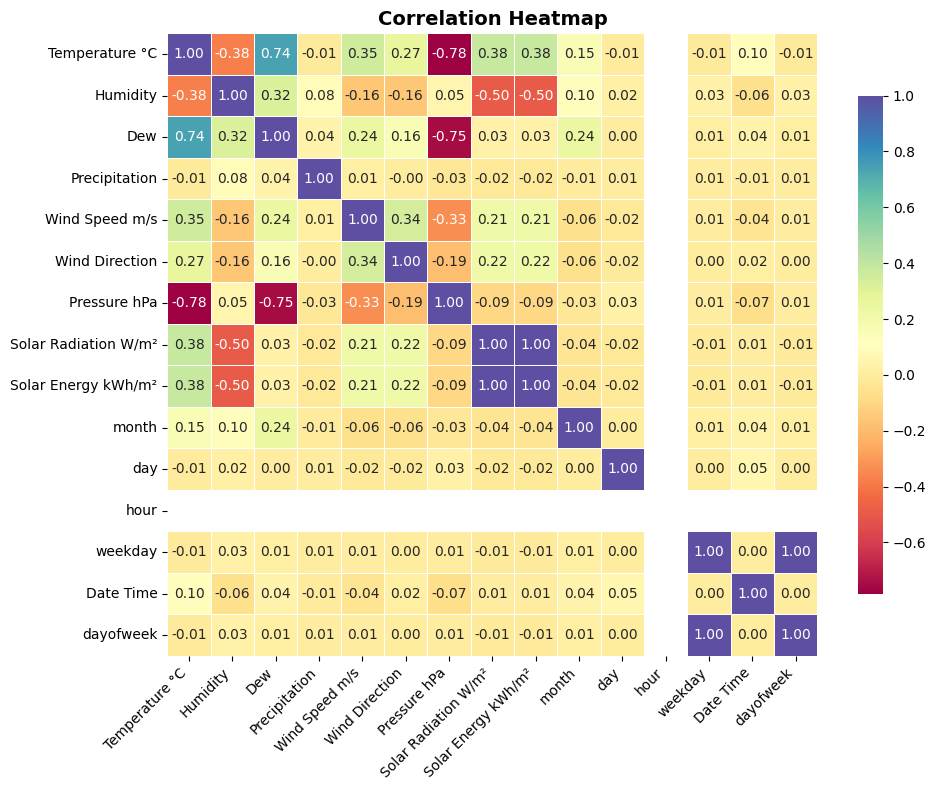

In [260]:
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df.corr(), 
    annot=True, 
    fmt=".2f",              # Show only 2 decimal places
    cmap='Spectral',        # More colorful and clear than 'coolwarm'
    linewidths=0.5,         # Thin lines between boxes
    linecolor='white',      # Line color
    annot_kws={"size": 10}, # Annotation font size
    cbar_kws={'shrink': 0.8} # Shrink color bar for better visibility
)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels
plt.yticks(rotation=0, fontsize=10)               # Keep y labels straight
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()  # Adjust layout to avoid cutoff
plt.show()


#### TO remove the duplicates 

In [244]:
combined_df.duplicated().sum()  # Check for duplicate rows
combined_df[combined_df.duplicated()]  # Display duplicate rows
combined_df.drop_duplicates(inplace=True)  # Remove duplicate rows
combined_df.duplicated().sum()  # Check again for duplicates

np.int64(0)

### Now check again the heat corr map to explore corerelation through seaborn heatmap

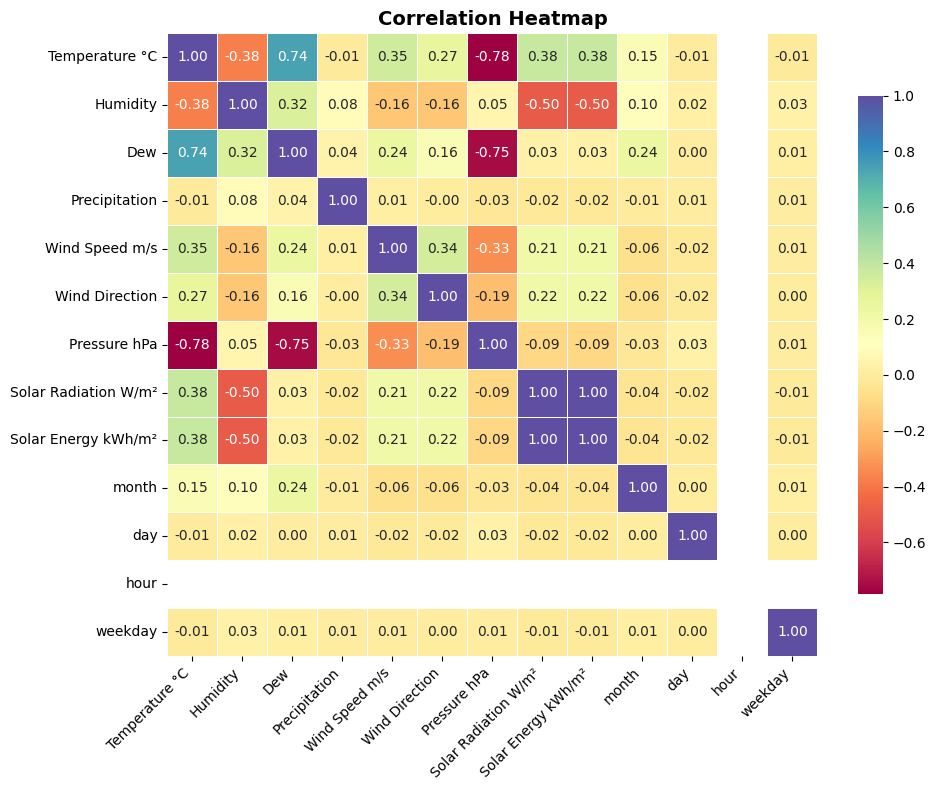

In [245]:
combined_df['month'] = combined_df.index.month
combined_df['day'] = combined_df.index.day
combined_df['hour'] = combined_df.index.hour
combined_df['weekday'] = combined_df.index.dayofweek
plt.figure(figsize=(10, 8))
sns.heatmap(combined_df.corr(), 
    annot=True, 
    fmt=".2f",              # Show only 2 decimal places
    cmap='Spectral',        # More colorful and clear than 'coolwarm'
    linewidths=0.5,         # Thin lines between boxes
    linecolor='white',      # Line color
    annot_kws={"size": 10}, # Annotation font size
    cbar_kws={'shrink': 0.8} # Shrink color bar for better visibility
)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels
plt.yticks(rotation=0, fontsize=10)               # Keep y labels straight
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()  # Adjust layout to avoid cutoff
plt.show()


#### Now apply Standard Scaler before  machine learning model 


In [ ]:
print("Now our data is ready we will apply machine learning model")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
feaure_to_scale = ["Humidity",	"Dew",	"Precipitation",	"Wind Speed m/s",	"Wind Direction",	"Pressure hPa",	"Solar Radiation W/m²",	"Solar Energy kWh/m²"]
scaler = StandardScaler()
combined_df[feaure_to_scale] = scaler.fit_transform(combined_df[feaure_to_scale])


Now our data is ready we will apply machine learning model


### To check the range of Date

In [270]:
print(combined_df.index.min(), combined_df.index.max())


2023-07-01 00:00:00 2024-11-30 00:00:00


### Prepare feature and target variables

In [271]:
feaures = ["Humidity", "Dew", "Precipitation",
            "Wind Speed m/s", "Wind Direction", "Pressure hPa",
              "Solar Radiation W/m²", "Solar Energy kWh/m²",
                "hour", "day", "month", "dayofweek"]
target = "Temperature °C"
X = combined_df[feaures]
y= combined_df[target]


split_date = '2024-06-01'

X_train = X[X.index < split_date]
X_test  = X[X.index >= split_date]

y_train = y[X.index < split_date]
y_test  = y[X.index >= split_date]

# Confirm non-empty
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


# Now import a model 
from sklearn.ensemble import RandomForestRegressor  
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Now fit the model on train data
model.fit(X_train, y_train)
# Now make predictions on the test data
model_predictions = model.predict(X_test)


Train shape: (47710, 12)
Test shape: (25990, 12)


### Model Evaluation:


In [272]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:" + str(mean_absolute_error(y_test, model_predictions)))
print("MSE:" + str(mean_squared_error(y_test,model_predictions)))
print("R2 SCORE:" + str(r2_score(y_test, model_predictions)))

MAE:0.09668437860715653
MSE:0.08066455963832231
R2 SCORE:0.9989710399193653


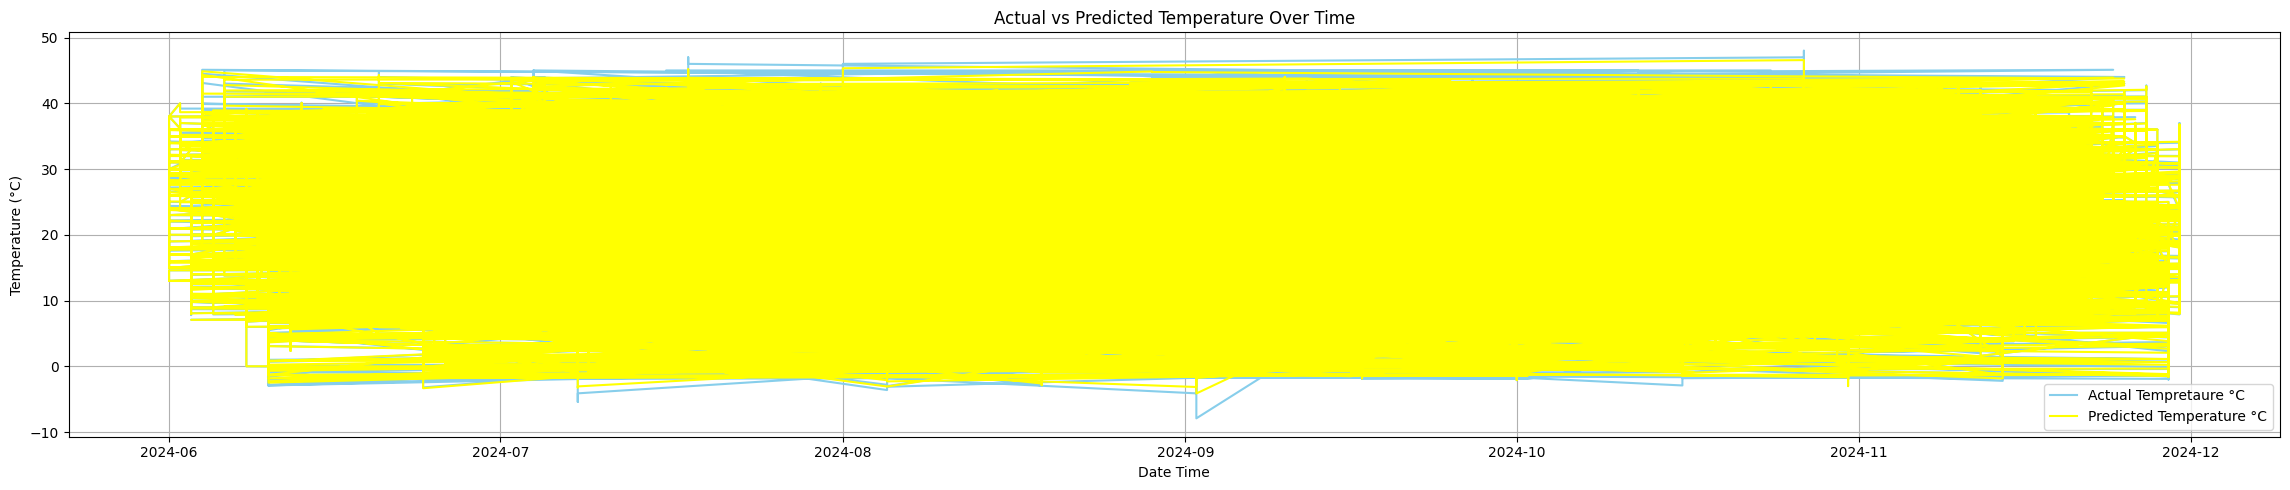

In [279]:
plt.figure(figsize=(23, 5))
plt.plot(y_test.index, y_test, label="Actual Tempretaure °C", color='skyblue')
plt.plot(y_test.index,model_predictions,label="Predicted Temperature °C", color='yellow')
plt.title('Actual vs Predicted Temperature Over Time')
plt.xlabel('Date Time')
plt.ylabel('Temperature (°C)')  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

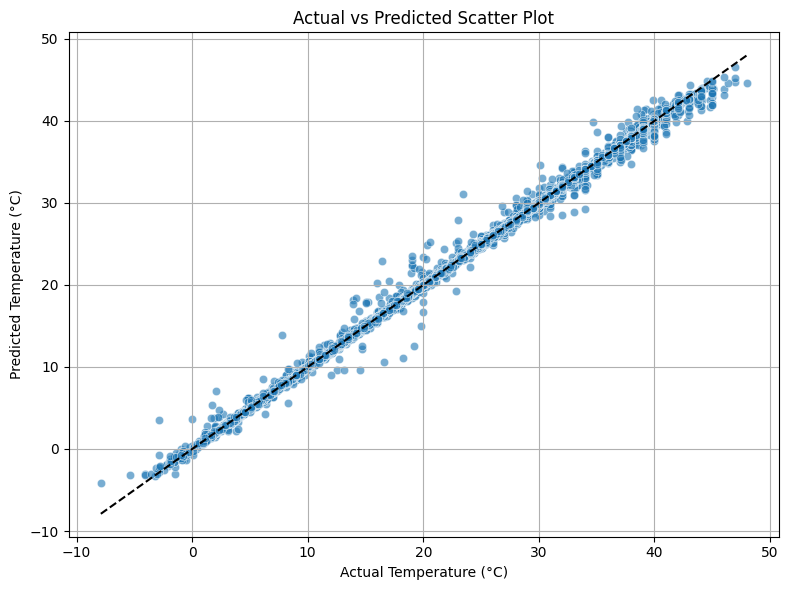

In [276]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=model_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Scatter Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


### Residual errors figure:

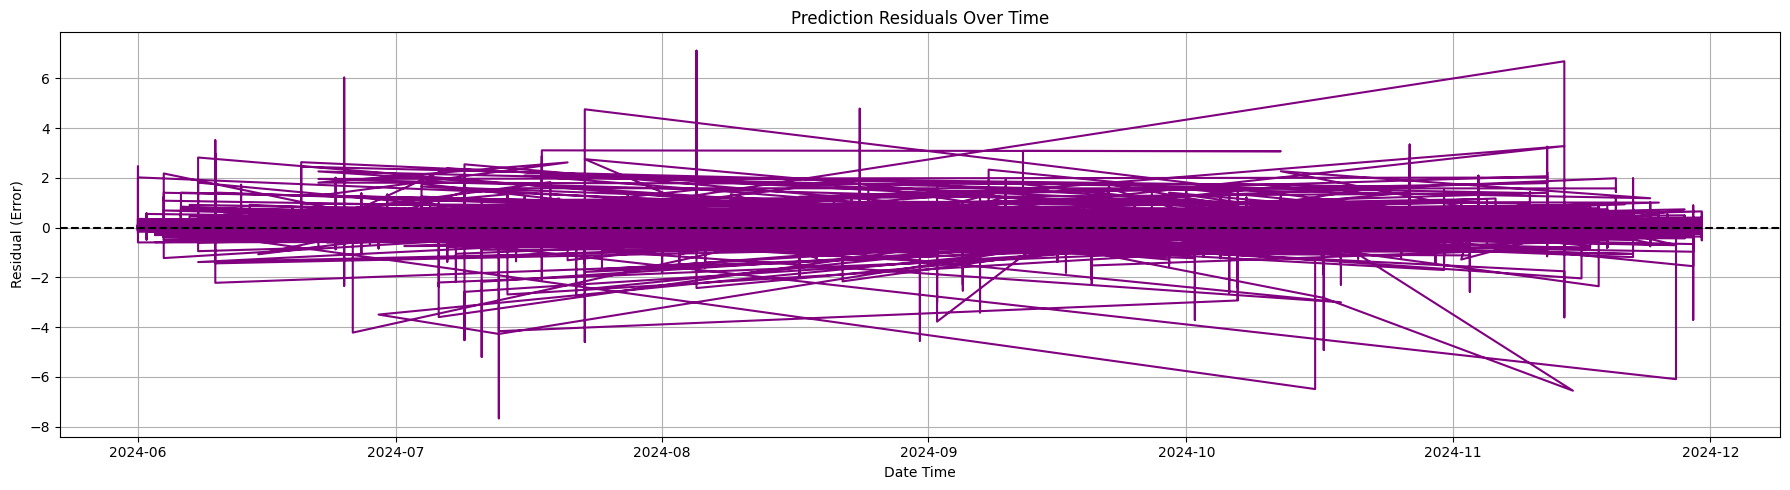

In [277]:
residuals = y_test - model_predictions
plt.figure(figsize=(18, 5))
plt.plot(y_test.index, residuals, color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.title("Prediction Residuals Over Time")
plt.xlabel("Date Time")
plt.ylabel("Residual (Error)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Feature Importance in this Dataset

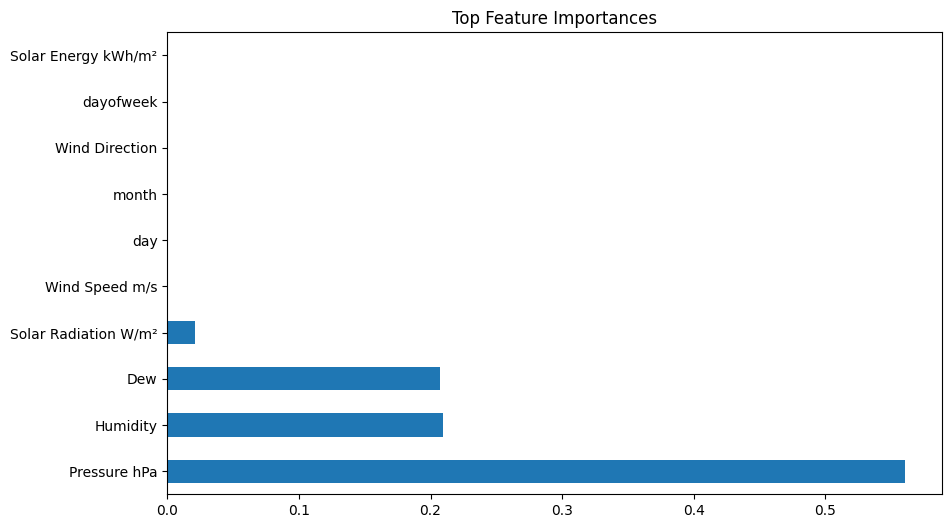

In [280]:
feat_imp.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top Feature Importances")
plt.show()

# Objectives Which is Achived Are Given Below:
### 📌 Model Objective
#### "We trained a RandomForestRegressor to predict future temperature based on past weather data, including humidity, solar radiation, wind speed, pressure, and time-based features."

### 📌 Results Summary
#### "The model achieved an R² score of 0.998, indicating nearly perfect predictive power on unseen test data."

### 📌 Feature Importance
#### "The most influential features were: [show bar plot], indicating that [e.g., solar radiation and humidity] play a key role in temperature fluctuations."

### 📌 Data Period
#### "Training data ranged from {start_date} to {split_date}, while predictions were made from {split_date} onward."